In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import os
from random import shuffle
import cv2

TEST_DIR = r'C:\Users\aman\Documents\jupitor_projects\Trafiic_sign_classifier using CNN\Testing'
TRAIN_DIR = r'C:\Users\aman\Documents\jupitor_projects\Trafiic_sign_classifier using CNN\Training'

Using TensorFlow backend.


In [27]:
IMG_SIZE = 32
LR =1e-3
Model_Name = "TSC_using_CNN-{0}-{1}.model".format(LR, "2conv-basic")

def load_my_data(data_dir):
    all_dir = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
    
    data = []
    for d in tqdm(all_dir):
        files = os.path.join(data_dir, d)
        file_names = [os.path.join(files, fname) for fname in os.listdir(files) if fname.endswith(".ppm")]
        for f in file_names:
            img = cv2.resize(cv2.imread(f), (IMG_SIZE, IMG_SIZE))
            img = np.array(img)
            data.append([img, int(d)])
    return data

print("-------------------------- 61 files from train ---------------")
train_data = load_my_data(TRAIN_DIR)
print("-------------------------- 61 files from test ---------------")
test_data = load_my_data(TEST_DIR)

-------------------------- 61 files from train ---------------


100%|██████████████████████████████████████████████████████████████████████████████████| 62/62 [00:03<00:00, 17.47it/s]


-------------------------- 61 files from test ---------------


100%|██████████████████████████████████████████████████████████████████████████████████| 62/62 [00:01<00:00, 35.00it/s]


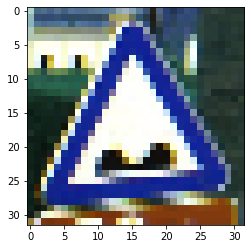

In [19]:
plt.imshow(train_data[0][0])

In [20]:
shuffle(train_data)
shuffle(test_data)
np.save("train_data.npy", train_data)
np.save("test_data.npy", test_data)

In [51]:

#modeling using tensorflow and network arch. LeNet-5

model = tf.keras.models.Sequential()
input_s = (IMG_SIZE, IMG_SIZE, 3)
#1.convolution layer with 64 filters and each filter of 5X5
model.add(tf.keras.layers.Conv2D(kernel_size = (5, 5), filters = 32, input_shape = input_s, activation=tf.nn.relu))
#2. max pool layer with srides=2 and fliter of size 2X2
model.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2))
    
#1.convolution layer with 64 filters and each filter of 5X5
model.add(tf.keras.layers.Conv2D(kernel_size = (5, 5), filters = 70, activation=tf.nn.relu))
#2. max pool layer with srides=2 and fliter of size 2X2
model.add(tf.keras.layers.MaxPool2D(pool_size = (2, 2), strides = 2))

#flatten the data for fully connected layers
model.add(tf.keras.layers.Flatten())

#1st FC
model.add(tf.keras.layers.Dense(1064, activation=tf.nn.relu))
#2nd FC
model.add(tf.keras.layers.Dense(512, activation=tf.nn.relu))

#final softmax for classification
model.add(tf.keras.layers.Dense(62, activation=tf.nn.softmax))

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])


In [31]:
x_train = np.array([item[0] for item in train_data[:]])
x_train = np.reshape(x_train, (-1, IMG_SIZE, IMG_SIZE, 3))
y_train = np.array([item[1] for item in train_data[:]])

x_train.shape


(4575, 32, 32, 3)

In [52]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
4575/4575 [==============================] - 23s 5ms/sample - loss: 3.8884 - acc: 0.6271
Epoch 2/3
4575/4575 [==============================] - 22s 5ms/sample - loss: 0.4087 - acc: 0.8975
Epoch 3/3
4575/4575 [==============================] - 22s 5ms/sample - loss: 0.2156 - acc: 0.9445


In [28]:
testx = np.array([item[0] for item in test_data[:]])
testx = np.reshape(testx, (-1, IMG_SIZE, IMG_SIZE, 3))
testy = np.array([item[1] for item in test_data[:]])
testx.shape
testy.shape

(2520,)

In [53]:
x = model.evaluate(testx, testy)
print(x)

2520/2520 [==============================] - 3s 1ms/sample - loss: 0.5330 - acc: 0.8877
[0.5330346159286804, 0.8876984]


In [54]:
model.save('tsc_model.model')

In [55]:
nw_model = tf.keras.models.load_model("tsc_model.model")

W0627 23:21:05.538877  4392 deprecation.py:506] From C:\Users\aman\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0627 23:21:05.542875  4392 deprecation.py:506] From C:\Users\aman\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
